In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Dense,GlobalMaxPool1D,LSTM,Embedding
from tensorflow.keras.models import Model

In [29]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df=pd.read_csv("/content/drive/MyDrive/NLP/spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
#rename columns
df.columns=['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
#create binary labels
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y=df['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(df['data'],Y,test_size=0.33)

In [36]:
#converting sentences into sequences
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train=tokenizer.texts_to_sequences(x_train)
sequences_test=tokenizer.texts_to_sequences(x_test)

In [37]:
#word to idx
word2idx=tokenizer.word_index
V= len(word2idx)
print(f"found {V} unique tokens")

found 7195 unique tokens


In [38]:
#pad sequences so that we get NxT matrix
data_train=pad_sequences(sequences_train)
print("shape of data train: ",data_train.shape)
#get sequence length
T=data_train.shape[1]

shape of data train:  (3733, 189)


In [39]:
data_test=pad_sequences(sequences_test,maxlen=T)
print("shape of data test: ",data_test.shape)

shape of data test:  (1839, 189)


In [40]:
#create the model
#we get to choose embedding dimensionality
D=20
#hidden state dimensionality
M=15

#note:we actually want to size of the embedding to (V+1)xd,
#because the first index start from 1 not 0
#thus if the final index of embedding matrix is V
#the actally it must have the size of V+1
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [41]:
#compile and fit
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
r=model.fit(data_train,y_train,epochs=15,validation_data=(data_test,y_test))

Epoch 1/15
117/117 [==============================] - 22s 157ms/step - loss: 0.4747 - accuracy: 0.8636 - val_loss: 0.3842 - val_accuracy: 0.8679
Epoch 2/15
117/117 [==============================] - 13s 113ms/step - loss: 0.3195 - accuracy: 0.8650 - val_loss: 0.2553 - val_accuracy: 0.8679
Epoch 3/15
117/117 [==============================] - 4s 38ms/step - loss: 0.2156 - accuracy: 0.8650 - val_loss: 0.1880 - val_accuracy: 0.8679
Epoch 4/15
117/117 [==============================] - 3s 27ms/step - loss: 0.1518 - accuracy: 0.9812 - val_loss: 0.1338 - val_accuracy: 0.9842
Epoch 5/15
117/117 [==============================] - 4s 33ms/step - loss: 0.1019 - accuracy: 0.9930 - val_loss: 0.1011 - val_accuracy: 0.9859
Epoch 6/15
117/117 [==============================] - 3s 25ms/step - loss: 0.0718 - accuracy: 0.9952 - val_loss: 0.0874 - val_accuracy: 0.9842
Epoch 7/15
117/117 [==============================] - 2s 18ms/step - loss: 0.0527 - accuracy: 0.9979 - val_loss: 0.0773 - val_accuracy: 0.

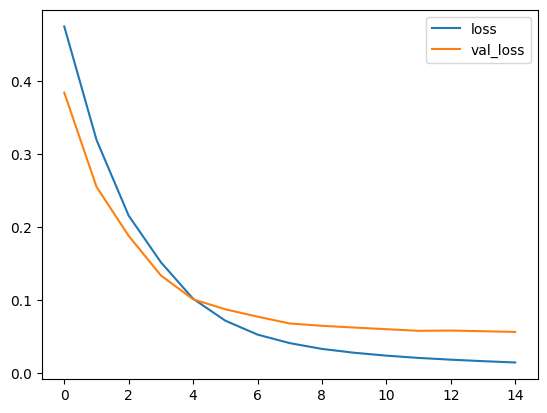

In [43]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

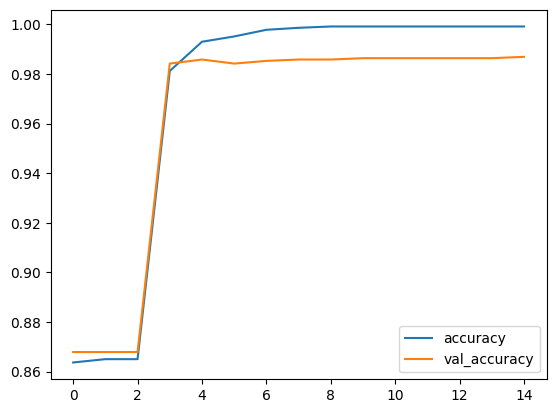

In [44]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [50]:
def predict_and_display(model, data_test, num_inputs=5):
    # Make predictions
    predictions = model.predict(data_test[:num_inputs])

    # Map predictions to binary labels (0: 'ham', 1: 'spam')
    predicted_labels = ['ham' if p < 0.5 else 'spam' for p in predictions.flatten()]

    # Display inputs and predicted outputs
    for i in range(num_inputs):
        print("Input:", x_test.iloc[i])
        print("Predicted Output:", predicted_labels[i])
        print()

predict_and_display(model, data_test, num_inputs=5)

1/1 [==============================] - 0s 21ms/step
Input: Sorry i cant take your call right now. It so happens that there r 2waxsto do wat you want. She can come and ill get her medical insurance. And she'll be able to deliver and have basic care. I'm currently shopping for the right medical insurance for her. So just give me til friday morning. Thats when i.ll see the major person that can guide me to the right insurance.
Predicted Output: ham

Input: It will stop on itself. I however suggest she stays with someone that will be able to give ors for every stool.
Predicted Output: ham

Input: Dont give a monkeys wot they think and i certainly don't mind. Any friend of mine&all that! Just don't sleep wiv , that wud be annoyin!
Predicted Output: ham

Input: Easy ah?sen got selected means its good..
Predicted Output: ham

Input: K:)i will give my kvb acc details:)
Predicted Output: ham



In [51]:
model.save("spam_classifier_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
https://drive.google.com/drive/folders/1HVSQgB3ATBvabau6bSbome7hbS-HXge7